In [353]:
import numpy as np
import pandas as pd

In [354]:
df = pd.read_csv('./spam.csv',encoding = "ISO-8859-1")

In [355]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2673,ham,"Good afternoon, my boytoy ... How are you feel...",NaN,NaN,NaN
3018,ham,Wat time do u wan 2 meet me later?,NaN,NaN,NaN
2359,spam,Spook up your mob with a Halloween collection ...,NaN,NaN,NaN
1364,ham,Hey i will be really pretty late... You want t...,NaN,NaN,NaN
1512,ham,"Hey sweet, I was wondering when you had a mome...",NaN,NaN,NaN


In [356]:
df.shape

(5572, 5)

In [357]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [359]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [360]:
df.sample(5)

,v1,v2
466,ham,They don't put that stuff on the roads to keep...
5120,spam,PRIVATE! Your 2003 Account Statement for 078
424,ham,Send this to ur friends and receive something ...
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool
1294,ham,Aiyah u did ok already lar. E nydc at wheellock?


In [361]:
# ranaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [362]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [363]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [364]:
df['target'] = encoder.fit_transform(df['target'])

In [365]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [366]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [367]:
# check for duplicate values
df.duplicated().sum()

403

In [368]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [369]:
df.duplicated().sum()

0

In [370]:
df.shape

(5169, 2)

## 2. EDA

In [371]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

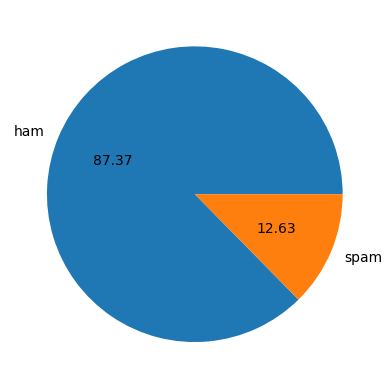

In [372]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [373]:
# Data is imbalanced

In [374]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [375]:
import nltk

In [376]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [377]:
df['num_characters'] = df['text'].apply(len) # number of characters in the text col for each row

In [378]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [379]:
# num of words
df['text'].apply(lambda txt: nltk.word_tokenize(txt))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [380]:
df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [381]:
df['num_words'] = df['text'].apply(lambda txt: len(nltk.word_tokenize(txt)))

In [382]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [383]:
df['text'].apply(lambda txt: nltk.sent_tokenize(txt))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [384]:
df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [385]:
df['num_sentences'] = df['text'].apply(lambda txt: len(nltk.sent_tokenize(txt)))

In [386]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [387]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [388]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [389]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [390]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [391]:
# histograms
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

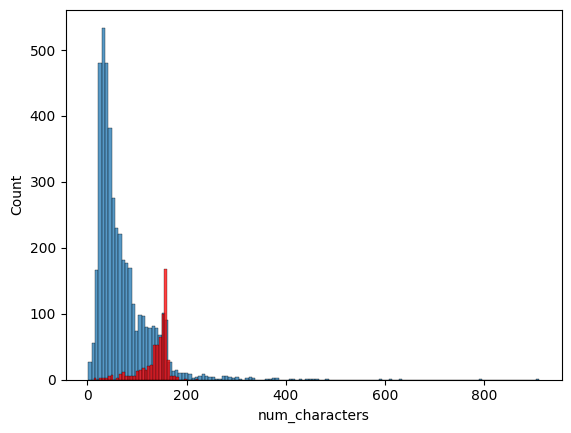

In [392]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

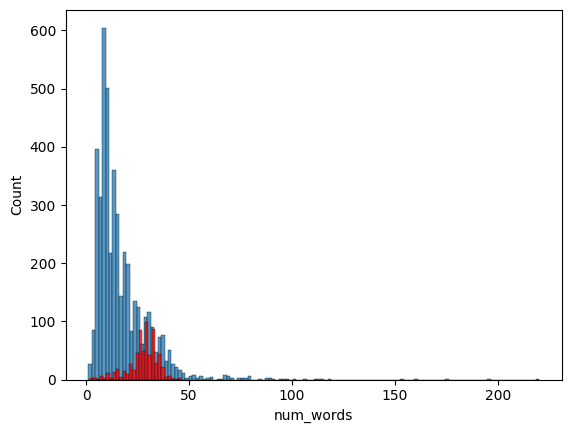

In [393]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

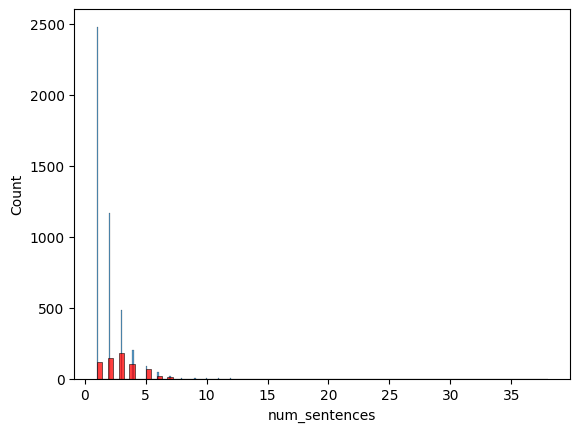

In [394]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

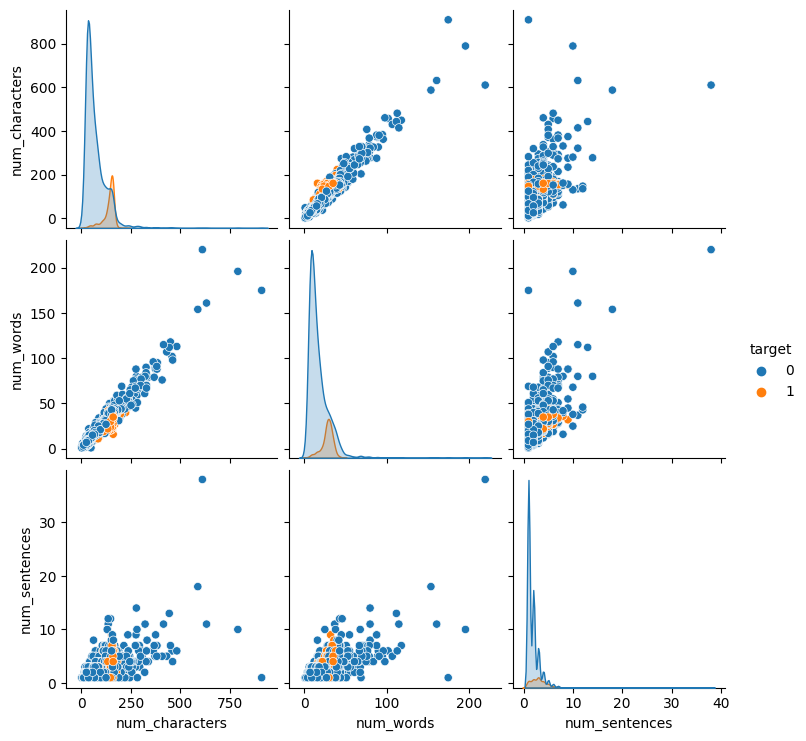

In [395]:
sns.pairplot(df, hue='target')

In [396]:
except_text = df.drop(columns='text')
except_text.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [397]:
except_text.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

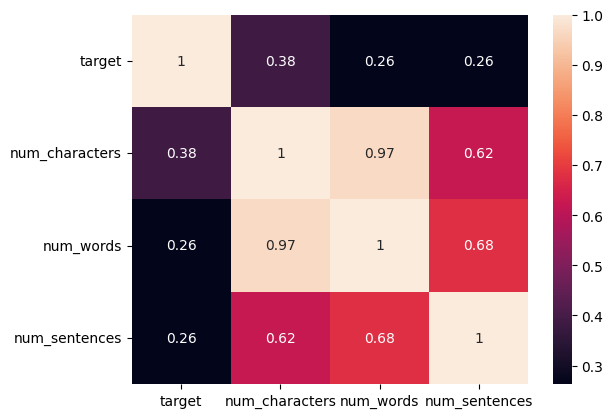

In [398]:
sns.heatmap(except_text.corr(), annot=True)

In [399]:
# Observations
# num_characters have the highest correlation with target ie. 0.38
# so we will keep num_characters and drop num_words and num_sentences

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Remove stop words and punctuation
- Stemming

In [400]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [401]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [402]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [403]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem('dancing'))
print(ps.stem('loving'))

danc
love


In [404]:


def transform_text(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    return text

In [405]:
text = 'Hi how Are you? my friend Rahul You got a 20% raise'
print(text)
transform_text(text)

Hi how Are you? my friend Rahul You got a 20% raise


['hi', 'friend', 'rahul', 'got', '20', 'rais']

In [406]:
transform_text('Did you like my presentation on ML?')

['like', 'present', 'ml']

In [407]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

['love', 'yt', 'lectur', 'machin', 'learn']

In [408]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [409]:
transform_text(df['text'][0])

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [410]:
df['transformed_text'] = df['text'].apply(transform_text)

In [411]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [412]:
df['transformed_text'].describe()

count     5169
unique    5094
top         []
freq         9
Name: transformed_text, dtype: object

In [413]:

spam_concatenated_text = " ".join(np.concatenate(df[df['target'] == 1]['transformed_text'].values))


In [414]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [415]:
# word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,background_color='white')


In [416]:
test_wc = wc.generate("Your text goes here wooho we changed the world")

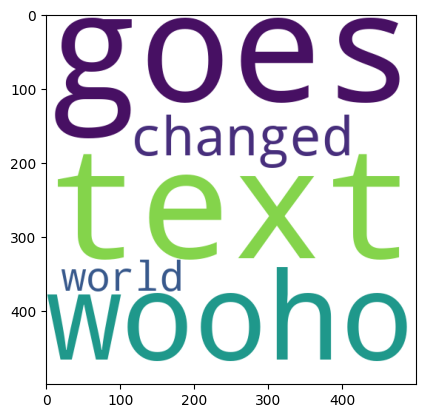

In [417]:
plt.imshow(test_wc)

In [418]:
spam_wc = wc.generate(spam_concatenated_text)

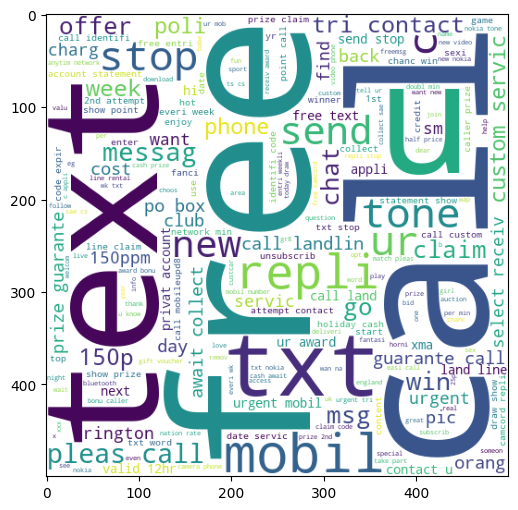

In [421]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

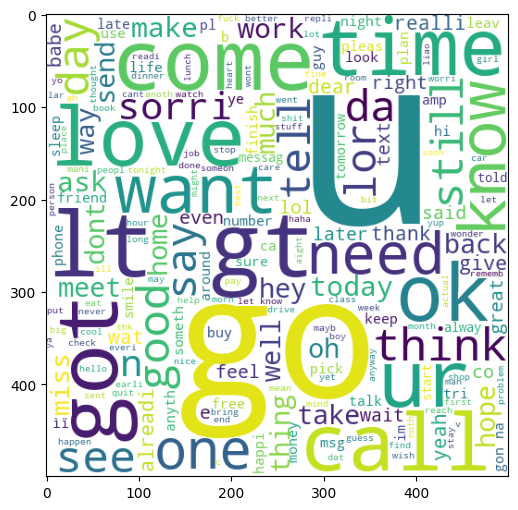

In [422]:
ham_concatenated_text = " ".join(np.concatenate(df[df['target'] == 0]['transformed_text'].values))
ham_wc = wc.generate(ham_concatenated_text)
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)